# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [77]:
# Read the XLSX file
data = pd.read_csv("data/dataset_silver.csv")

In [78]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,Anglais,Long-métrage,2023,7178203.0,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,Français,Long-métrage,2023,269253.0,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
2,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,Français,Long-métrage,2023,2306.0,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849
3,Luise,2023-05-07,"Drame,Historique,Romance",99.0,Matthias Luthardt,Pyramide Distribution,"['Luise Aschenbrenner', 'Christa Théret', 'Leo...",France,Français,Long-métrage,2023,1745.0,2.8,2.8,6.0,NaN,Octobre 1918. La Première Guerre mondiale s’ét...,1215
4,Paula,2017-01-03,"Biopic,Drame",123.0,Christian Schwochow,Happiness Distribution / Pyramide Distribution,"['Carla Juri', 'Albrecht Schuch', 'Roxane Duran']",Allemagne,Allemand,Long-métrage,2016,43349.0,2.8,3.0,18.0,NaN,"1900, Nord de l’Allemagne. Paula Becker a 24 a...",20306


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             3948 non-null   object 
 1   date              3948 non-null   object 
 2   genre             3948 non-null   object 
 3   durée             3948 non-null   float64
 4   réalisateur       3948 non-null   object 
 5   distributeur      3948 non-null   object 
 6   acteurs           3948 non-null   object 
 7   nationalités      3948 non-null   object 
 8   langue_d_origine  3931 non-null   object 
 9   type_film         3948 non-null   object 
 10  annee_production  3948 non-null   int64  
 11  box_office_total  3369 non-null   float64
 12  note_presse       3948 non-null   float64
 13  note_spectateurs  3948 non-null   float64
 14  nombre_article    3882 non-null   float64
 15  recompenses       1605 non-null   object 
 16  description       3544 non-null   object 


In [80]:
data.shape

(3948, 18)

## <font color="green"> || - Missing Data </font>

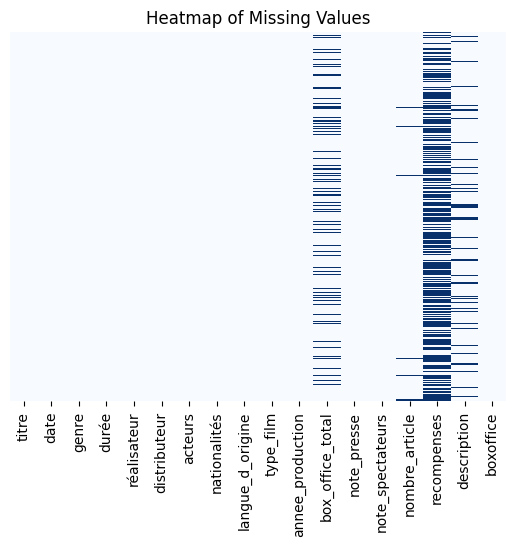

In [81]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [82]:
data.isnull().sum()

titre                  0
date                   0
genre                  0
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine      17
type_film              0
annee_production       0
box_office_total     579
note_presse            0
note_spectateurs       0
nombre_article        66
recompenses         2343
description          404
boxoffice              0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [83]:
data.duplicated().sum()

0

## <font color="green"> IV - Ajout colonnes Awards et Nominations </font>

In [84]:
# Extract the number of awards and nominations using regular expressions
data['awards'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) prix', str(x)).group(1)) if re.search(r'(\d+) prix', str(x)) else 0)
data['nominations'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) nominations', str(x)).group(1)) if re.search(r'(\d+) nominations', str(x)) else 0)

In [85]:
# Drop the 'recompenses' column if no longer needed
data.drop(columns=['recompenses'], inplace=True)

In [86]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,awards,nominations
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,Anglais,Long-métrage,2023,7178203.0,3.1,4.1,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,0,0
1,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,Français,Long-métrage,2023,269253.0,2.2,3.4,6.0,"François, futur académicien, est un écrivain c...",109081,0,0
2,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,Français,Long-métrage,2023,2306.0,3.3,3.2,12.0,"Dans le Paris désert du premier confinement, A...",1849,0,0
3,Luise,2023-05-07,"Drame,Historique,Romance",99.0,Matthias Luthardt,Pyramide Distribution,"['Luise Aschenbrenner', 'Christa Théret', 'Leo...",France,Français,Long-métrage,2023,1745.0,2.8,2.8,6.0,Octobre 1918. La Première Guerre mondiale s’ét...,1215,0,0
4,Paula,2017-01-03,"Biopic,Drame",123.0,Christian Schwochow,Happiness Distribution / Pyramide Distribution,"['Carla Juri', 'Albrecht Schuch', 'Roxane Duran']",Allemagne,Allemand,Long-métrage,2016,43349.0,2.8,3.0,18.0,"1900, Nord de l’Allemagne. Paula Becker a 24 a...",20306,0,0


## <font color="green"> V - Ajout colonnes nombre Acteurs Connus </font>

In [87]:

# # Charger le fichier "top_acteur.csv" contenant les acteurs connus dans un DataFrame
df_acteurs_connus = pd.read_csv('data/top_acteurs.csv')

In [88]:
# Créer un ensemble dans noms des acteurs connus à partir de la base de données des top acteurs
acteurs_connus = set(df_acteurs_connus['acteur'])

# Compter le nombre d'acteurs connus dans chaque film et créer une nouvelle colonne pour cela
data['nombre_acteurs_connus'] = data['acteurs'].apply(lambda x: len([acteur for acteur in eval(x) if acteur in acteurs_connus]))

# Ajouter une colonne contenant les acteurs connus dans chaque film
data['acteurs_connus'] = data['acteurs'].apply(lambda x: [acteur for acteur in eval(x) if acteur in acteurs_connus])


In [89]:

data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,...,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,awards,nominations,nombre_acteurs_connus,acteurs_connus
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,Anglais,Long-métrage,...,7178203.0,3.1,4.1,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,0,0,1,[Chris Pratt]
1,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,Français,Long-métrage,...,269253.0,2.2,3.4,6.0,"François, futur académicien, est un écrivain c...",109081,0,0,2,"[Lambert Wilson, Josiane Balasko]"
2,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,Français,Long-métrage,...,2306.0,3.3,3.2,12.0,"Dans le Paris désert du premier confinement, A...",1849,0,0,0,[]
3,Luise,2023-05-07,"Drame,Historique,Romance",99.0,Matthias Luthardt,Pyramide Distribution,"['Luise Aschenbrenner', 'Christa Théret', 'Leo...",France,Français,Long-métrage,...,1745.0,2.8,2.8,6.0,Octobre 1918. La Première Guerre mondiale s’ét...,1215,0,0,0,[]
4,Paula,2017-01-03,"Biopic,Drame",123.0,Christian Schwochow,Happiness Distribution / Pyramide Distribution,"['Carla Juri', 'Albrecht Schuch', 'Roxane Duran']",Allemagne,Allemand,Long-métrage,...,43349.0,2.8,3.0,18.0,"1900, Nord de l’Allemagne. Paula Becker a 24 a...",20306,0,0,0,[]


## <font color="green"> VI- Export gold Data </font>

In [90]:
#EXporter la data dans un Csv 
data.to_csv('data/dataset_gold.csv', index=False)